<a href="https://colab.research.google.com/github/OmerAGilin/Road2-AI-Course/blob/main/Copy_of_Road2_AI_Course_lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

good mornings, please prepare to write a code in pyhton using keras, but don't write anything yet

first, please import the fashion mnist dataset using tenzorflow as supervised with info

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Display information about the dataset
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)


4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


please print in a square grid of 5 by 5 only the pictrues containd in 25 examples from the dataset, and then a statisical analysis of the entire dataset, devided by training and testing

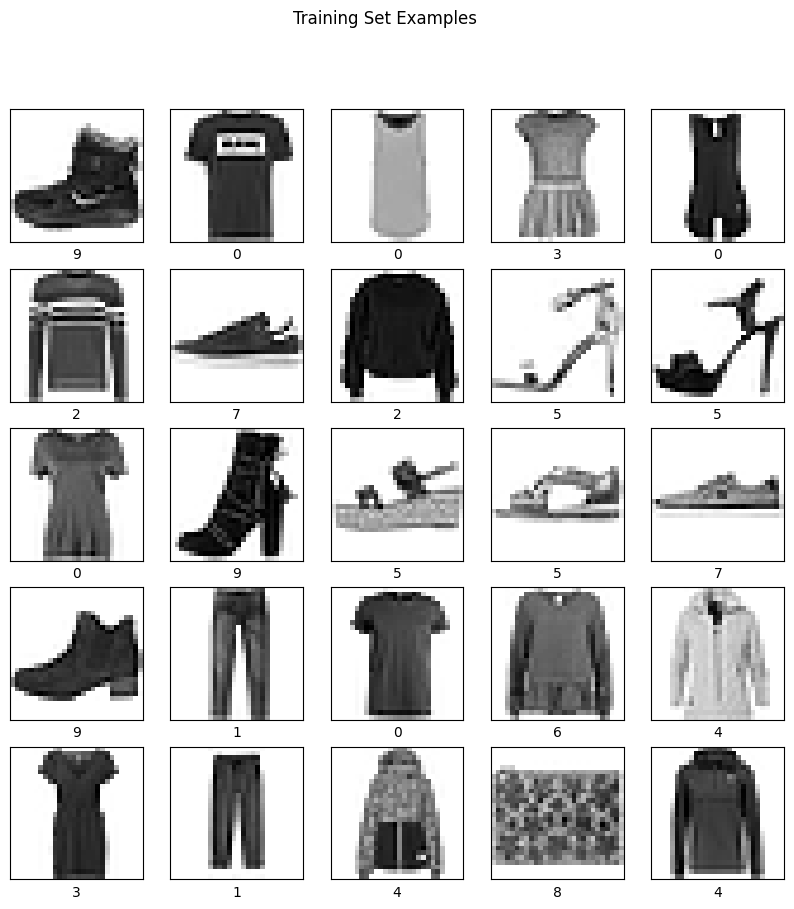

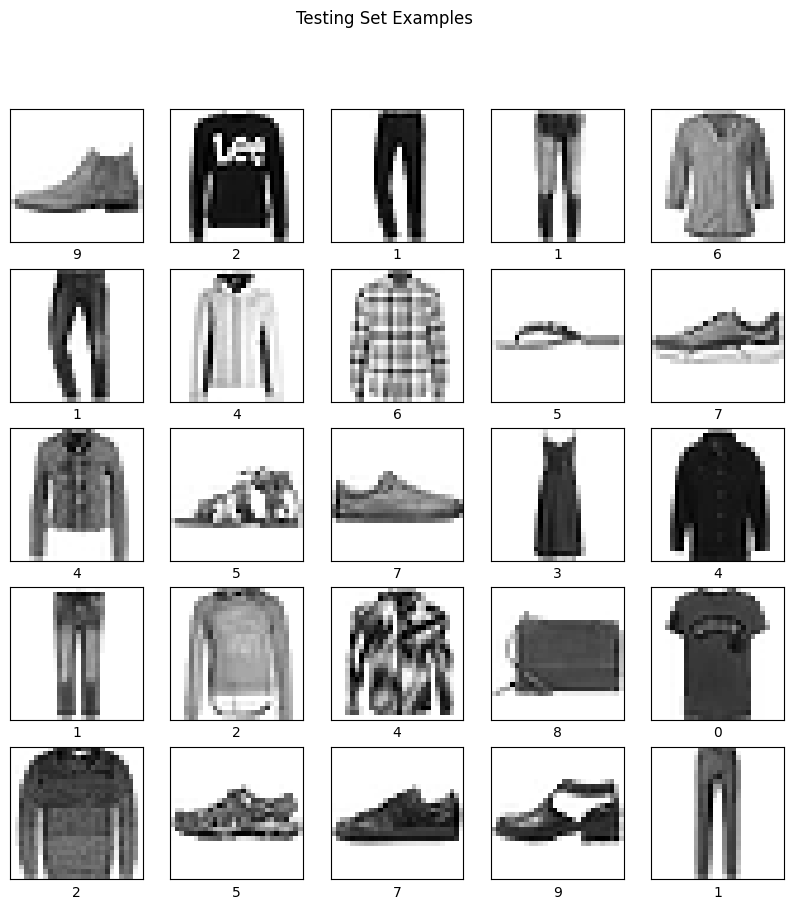


Training set statistics:
Number of examples: 60000
Image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Label counts: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]

Testing set statistics:
Number of examples: 10000
Image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Label counts: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a square grid of images
def plot_images(images, labels, title):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.suptitle(title)
    plt.show()

# Display a square grid of 5 by 5 with 25 examples from the training set
plot_images(train_images[:25], train_labels[:25], "Training Set Examples")

# Display a square grid of 5 by 5 with 25 examples from the testing set
plot_images(test_images[:25], test_labels[:25], "Testing Set Examples")

# Statistical analysis of the entire dataset
def dataset_statistics(images, labels, dataset_type):
    print(f"\n{dataset_type} set statistics:")
    print("Number of examples:", len(images))
    print("Image shape:", images.shape[1:])
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    print("Unique labels:", unique_labels)
    print("Label counts:", label_counts)

# Training set statistics
dataset_statistics(train_images, train_labels, "Training")

# Testing set statistics
dataset_statistics(test_images, test_labels, "Testing")


please show the meaning of the labels from 0 to 9 as set in the info of the dataset

T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot

using keras, please create a neural network as follows: the input, after padding the images, is a convolution layer using 32 kernels, that then activates max pooling using a 2 by 2 kernel with a stride of 2, the next layer, after padding the results of the previous layer, is yet another convolution layer using 32 kernels, that then activates max pooling using a 2 by 2 kernel with a stride of 2, lastly uses flattening, then softmax, and outputs the most probable outcome as the result in the form of the class's name according to the dataset's info

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add a convolutional layer with 32 kernels and activation function ReLU
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))

# Add max pooling layer with a 2x2 kernel and stride of 2
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer with 32 kernels and activation function ReLU
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))

# Add another max pooling layer with a 2x2 kernel and stride of 2
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output before the dense layer
model.add(layers.Flatten())

# Add a dense layer with softmax activation (output layer)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the summary of the model
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

fantastic. please print a graphical representation of the network's architecture

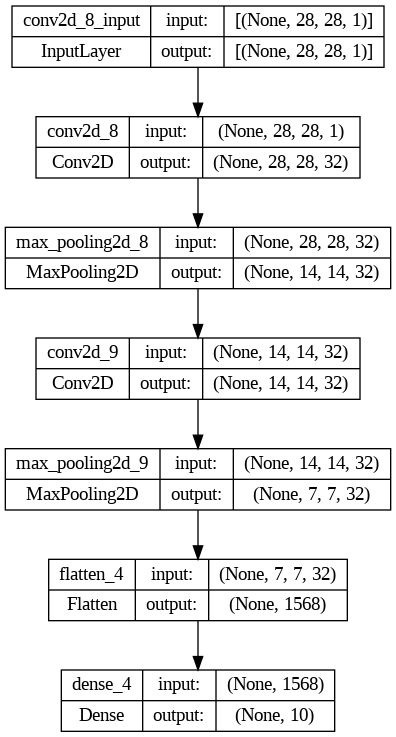

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the architecture plot to a file (e.g., 'model_architecture.png')
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


now, please train the network using the entire training portion of the dataset over 50 epochs, using adam's optimizer, and then print its learning curve

Epoch 1/50
1500/1500 [==============================] - 15s 4ms/step - loss: 0.6858 - accuracy: 0.8211 - val_loss: 0.3784 - val_accuracy: 0.8640
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3471 - accuracy: 0.8759 - val_loss: 0.3580 - val_accuracy: 0.8708
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3091 - accuracy: 0.8871 - val_loss: 0.3298 - val_accuracy: 0.8842
Epoch 4/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2906 - accuracy: 0.8940 - val_loss: 0.3330 - val_accuracy: 0.8827
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2709 - accuracy: 0.9010 - val_loss: 0.3490 - val_accuracy: 0.8787
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2611 - accuracy: 0.9045 - val_loss: 0.3068 - val_accuracy: 0.8928
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2510 - accuracy: 0.9085 - val_loss: 0.3197 - val_accuracy

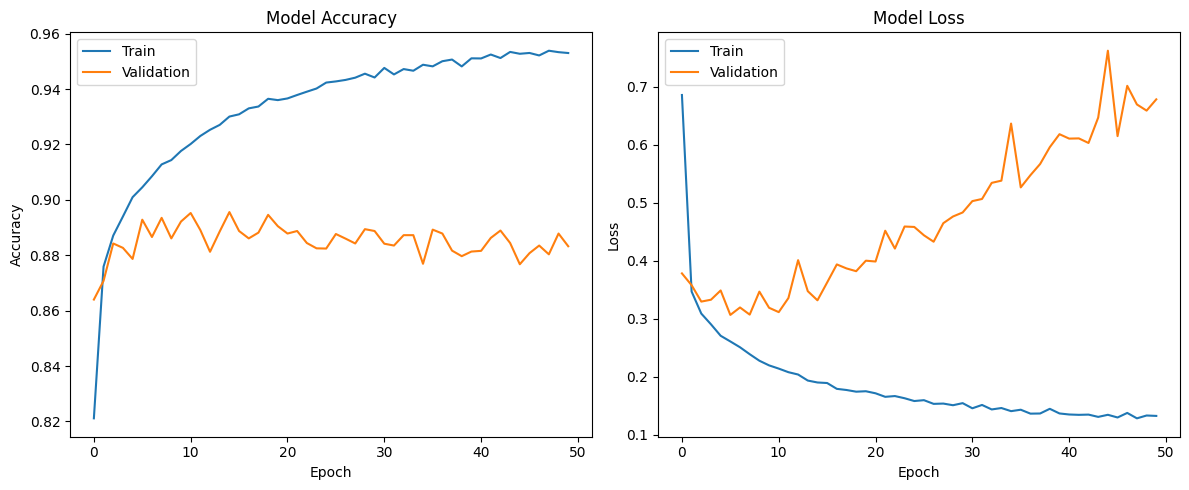

In [ ]:
import matplotlib.pyplot as plt

# Expand the dimensions of the images to match the input shape
train_images_expanded = np.expand_dims(train_images, axis=-1)

# Train the model
history = model.fit(train_images_expanded, train_labels, epochs=50, validation_split=0.2)

# Plot the learning curve
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


great job. please run 10000 tests of the network using the entire testing portion of the dataset and then print a confusion matrix of the result with classes' names according to the dataset's info

313/313 [==============================] - 1s 2ms/step


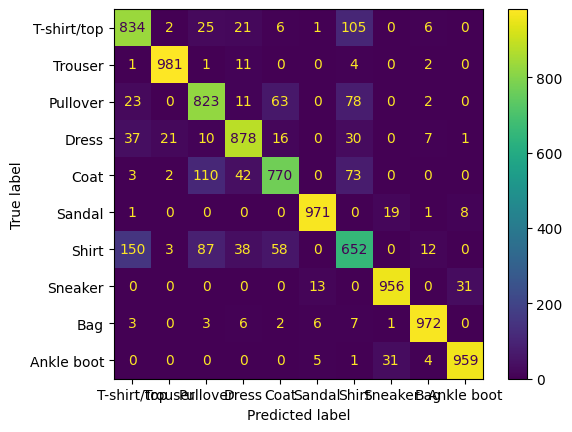

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Expand the dimensions of the testing images to match the input shape
test_images_expanded = np.expand_dims(test_images, axis=-1)

# Make predictions on the testing set
predictions = np.argmax(model.predict(test_images_expanded), axis=1)

# Create a confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Display the confusion matrix with class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')
plt.show()


last, please show the network's accuracy

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_expanded, test_labels, verbose=0)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 87.96%
